In [4]:
import csv
from datetime import datetime


CSV_FILE = "/content/12_personal_finance_analyzer.csv"

def initialize_csv():
    try:
        with open(CSV_FILE, 'r') as file:
            print(f"Using existing CSV file: {CSV_FILE}")
    except FileNotFoundError:
        print(f"The file {CSV_FILE} does not exist. Please upload it.")

initialize_csv()

Using existing CSV file: /content/12_personal_finance_analyzer.csv


<h1> 1.Income and Expense Tracking

In [5]:
# def get_next_id():
#     try:
#         with open(CSV_FILE, 'r') as file:
#             reader = csv.reader(file)
#             next(reader)
#             last_row = None
#             for last_row in reader:
#                 pass
#             if last_row:
#                 return int(last_row[0]) + 1
#             else:
#                 return 1
#     except FileNotFoundError:
#         return 1

def log_transaction(transaction_type, category, amount, description):

    # new_id = get_next_id()

    with open(CSV_FILE, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([
            # new_id,
            datetime.now().strftime("%Y-%m-%d"),
            category,
            transaction_type,
            amount,
            description,
            "",
            "",
            ""
        ])
    print(f"{transaction_type} of {amount} added to category {category}.")



<h1> 2.Financial Insights

In [6]:
import csv


def calculate_insights():
    total_income = 0
    total_expense = 0
    category_expenses = {}

    with open(CSV_FILE, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            try:
                amount = float(row["Amount"])
                if row["Type"] == "Income":
                    total_income += amount
                elif row["Type"] == "Expense":
                    total_expense += amount
                    category = row["Category"]
                    category_expenses[category] = category_expenses.get(category, 0) + amount
            except ValueError:
                pass

    print("\nFinancial Insights:")
    print(f"Total Income: {total_income}")
    print(f"Total Expense: {total_expense}")
    print(f"Net Savings: {total_income - total_expense}")
    print("\nExpenses by Category:")


    for category, expense in category_expenses.items():
        percentage = (expense / total_expense) * 100 if total_expense > 0 else 0
        print(f"  {category}: {expense} ({percentage:.2f}%)")

calculate_insights()



Financial Insights:
Total Income: 19000.0
Total Expense: 4680.0
Net Savings: 14320.0

Expenses by Category:
  Food: 1940.0 (41.45%)
  Transport: 580.0 (12.39%)
  Utilities: 1350.0 (28.85%)
  Entertainment: 810.0 (17.31%)


<h1> 3.Budget Planning

In [11]:
def check_budget_limits(budget_limits):
    category_expenses = {}

    with open(CSV_FILE, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row["Type"] == "Expense":
                category = row["Category"]
                amount = float(row["Amount"])
                category_expenses[category] = category_expenses.get(category, 0) + amount

    print("\nBudget Notifications:")
    for category, limit in budget_limits.items():
        spent = category_expenses.get(category, 0)
        if spent > limit:
            print(f"⚠️ You have exceeded the budget for {category}. Spent: {spent}, Limit: {limit}")

#Example
check_budget_limits({"Utilities": 100, "Transport": 50})



Budget Notifications:
⚠️ You have exceeded the budget for Utilities. Spent: 1350.0, Limit: 100
⚠️ You have exceeded the budget for Transport. Spent: 580.0, Limit: 50


<h1> 4.Saving Goals

In [13]:
def set_savings_goal(goal_amount, deadline):
    rows = []

    with open(CSV_FILE, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)


    if rows and len(rows[0]) >= 7:
        rows[0][5] = "Goal Amount"
        rows[0][6] = "Deadline"
        rows[1][5] = goal_amount
        rows[1][6] = deadline

    with open(CSV_FILE, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(rows)

    print(f"Savings goal of {goal_amount} set with deadline {deadline}.")

def update_current_savings(current_savings):
    rows = []

    with open(CSV_FILE, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)


    if rows and len(rows[0]) >= 8:
        rows[0][7] = "Current Savings"
        rows[1][7] = current_savings

    with open(CSV_FILE, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(rows)

    print(f"Current savings updated to {current_savings}.")


initialize_csv()


log_transaction("Income", "Freelancing", 500, "Freelance Project")
log_transaction("Expense", "Utilities", 150, "Electricity Bill")


calculate_insights()

#Checking Budget Limit
check_budget_limits({"Utilities": 150, "Transport": 200})

#Setting Saving Goal
set_savings_goal(10000, "2025-12-31")

#Updating Current Savings
update_current_savings(2500)


Using existing CSV file: /content/12_personal_finance_analyzer.csv
Income of 500 added to category Freelancing.
Expense of 150 added to category Utilities.

Financial Insights:
Total Income: 19000.0
Total Expense: 4680.0
Net Savings: 14320.0

Expenses by Category:
  Food: 1940.0 (41.45%)
  Transport: 580.0 (12.39%)
  Utilities: 1350.0 (28.85%)
  Entertainment: 810.0 (17.31%)

Budget Notifications:
⚠️ You have exceeded the budget for Utilities. Spent: 1350.0, Limit: 150
⚠️ You have exceeded the budget for Transport. Spent: 580.0, Limit: 200
Savings goal of 10000 set with deadline 2025-12-31.
Current savings updated to 2500.


<h1> 5.Visualization

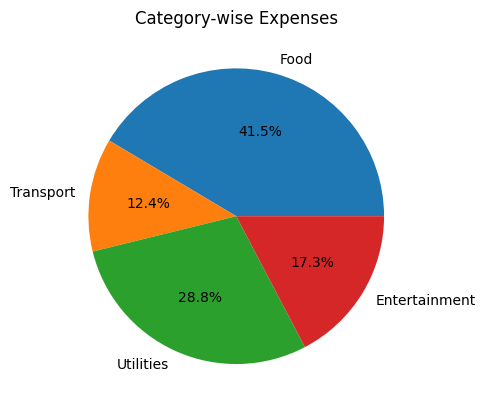

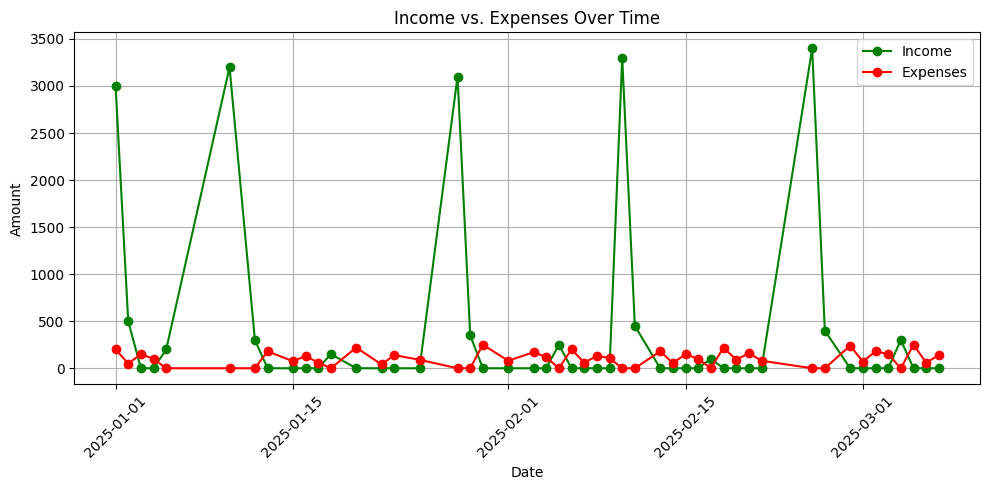

In [14]:
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
from datetime import datetime

def plot_expenses():
    category_expenses = {}

    with open(CSV_FILE, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row["Type"] == "Expense":
                category_expenses[row["Category"]] = category_expenses.get(row["Category"], 0) + float(row["Amount"])

    categories = list(category_expenses.keys())
    expenses = list(category_expenses.values())


    plt.pie(expenses, labels=categories, autopct='%1.1f%%')
    plt.title("Category-wise Expenses")
    plt.show()


def plot_income_vs_expenses():
    datewise_income_expenses = defaultdict(lambda: {"Income": 0, "Expense": 0})

    with open(CSV_FILE, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            try:

                date_str = row["Date"].strip()


                if not date_str:
                    print(f"Skipping row with empty 'Date' value: {row}")
                    continue



                try:
                    date = datetime.strptime(date_str, "%Y-%m-%d").date()
                except ValueError:
                    continue

                amount = float(row["Amount"])
                if row["Type"] == "Income":
                    datewise_income_expenses[date]["Income"] += amount
                elif row["Type"] == "Expense":
                    datewise_income_expenses[date]["Expense"] += amount
            except ValueError:
                continue


    dates = sorted(datewise_income_expenses.keys())
    income = [datewise_income_expenses[date]["Income"] for date in dates]
    expenses = [datewise_income_expenses[date]["Expense"] for date in dates]


    plt.figure(figsize=(10, 5))
    plt.plot(dates, income, label="Income", color='green', marker='o')
    plt.plot(dates, expenses, label="Expenses", color='red', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title('Income vs. Expenses Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_expenses()
print("\n\n")
plot_income_vs_expenses()


 <h1> 6.Interactive User Interface

In [2]:
def menu():
    while True:
        print("\nPersonal Finance Analyzer")
        print("1. Add Income")
        print("2. Add Expense")
        print("3. View Insights")
        print("4. Check Budget")
        print("5. Update Savings")
        print("6. Visualize Expenses")
        print("7. Exit")

        choice = input("Enter your choice: ")
        if choice == "1":
            category = input("Enter income category: ")
            amount = float(input("Enter amount: "))
            description = input("Enter description: ")
            log_transaction("Income", category, amount,description)
        elif choice == "2":
            category = input("Enter expense category: ")
            amount = float(input("Enter amount: "))
            description = input("Enter description: ")
            log_transaction("Expense", category, amount)
        elif choice == "3":
            calculate_insights()
        elif choice == "4":
            check_budget_limits()
        elif choice == "5":
            current_savings = float(input("Enter current savings: "))
            set_savings_goal(current_savings)
        elif choice == "6":
            plot_expenses()
        elif choice == "7":
            print("Goodbye!")
            break
        else:
            print("Invalid choice! Please try again.")


menu()



Personal Finance Analyzer
1. Add Income
2. Add Expense
3. View Insights
4. Check Budget
5. Update Savings
6. Visualize Expenses
7. Exit
Enter your choice: 7
Goodbye!
